# Novel Coronavirus: EDA & Forecast Number of Cases

## Background

The 2019 Novel Coronavirus, or 2019-nCoV, is a new respiratory virus first identified in Wuhan, Hubei Province, China. A novel coronavirus (nCoV) is a new coronavirus that has not been previously identified. The 2019 novel coronavirus (2019-nCoV), is not that same as the coronaviruses that commonly circulate among humans and cause mild illness, like the common cold.

A diagnosis with coronavirus 229E, NL63, OC43, or HKU1 is not the same as a 2019-nCoV diagnosis. These are different viruses and patients with 2019-nCoV will be evaluated and cared for differently than patients with common coronavirus diagnosis. 

Public health officials and partners are working hard to identify the source of the 2019-nCoV. Coronaviruses are a large family of viruses, some causing illness in people and others that circulate among animals, including camels, cats and bats. Analysis of the genetic tree of this virus is ongoing to know the specific source of the virus. SARS, another coronavirus that emerged to infect people, came from civet cats, while MERS, another coronavirus that emerged to infect people, came from camels. More information about the source and spread of 2019-nCoV is available on the 2019-nCoV Situation Summary: Source and Spread of the Virus.

This virus probably originally emerged from an animal source but now seems to be spreading from person-to-person. It’s important to note that person-to-person spread can happen on a continuum. Some viruses are highly contagious (like measles), while other viruses are less so. At this time, it’s unclear how easily or sustainably this virus is spreading between people. Learn what is known about the spread of newly emerged coronaviruses.

**Reference:** https://www.cdc.gov/coronavirus/2019-ncov/faq.html

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from fbprophet import Prophet
import pycountry
import plotly.express as px

## Data Import, Preprocessing and EDA

In [2]:
df = pd.read_csv('../input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv',parse_dates=['Last Update'])

In [3]:
df.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0


In [4]:
df.tail()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
1714,1715,02/17/2020 22:00:00,"Madison, WI",US,2020-02-05 21:53:02,1.0,0.0,0.0
1715,1716,02/17/2020 22:00:00,"Orange, CA",US,2020-02-01 19:53:03,1.0,0.0,0.0
1716,1717,02/17/2020 22:00:00,"San Antonio, TX",US,2020-02-13 18:53:02,1.0,0.0,0.0
1717,1718,02/17/2020 22:00:00,"Seattle, WA",US,2020-02-09 07:03:04,1.0,0.0,1.0
1718,1719,02/17/2020 22:00:00,"Tempe, AZ",US,2020-02-01 19:43:03,1.0,0.0,0.0


In [5]:
df2 = df.groupby(["Date", "Country"])[['Date', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [6]:
df2

,Date,Country,Confirmed,Deaths,Recovered
0,01/22/2020 12:00:00,China,549.0,0.0,0.0
1,01/22/2020 12:00:00,Japan,2.0,0.0,0.0
2,01/22/2020 12:00:00,South Korea,1.0,0.0,0.0
3,01/22/2020 12:00:00,Thailand,2.0,0.0,0.0
4,01/22/2020 12:00:00,US,1.0,0.0,0.0
...,...,...,...,...,...
650,02/17/2020 22:00:00,Thailand,35.0,0.0,15.0
651,02/17/2020 22:00:00,UK,9.0,0.0,8.0
652,02/17/2020 22:00:00,US,15.0,0.0,3.0
653,02/17/2020 22:00:00,United Arab Emirates,9.0,0.0,4.0


In [7]:
df.query('Country=="Mainland China"').groupby("Last Update")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Last Update,Confirmed,Deaths,Recovered
0,2020-01-02 01:52:00,8.0,0.0,0.0
1,2020-01-02 05:37:00,9.0,0.0,0.0
2,2020-01-02 15:23:00,64.0,0.0,1.0
3,2020-01-02 15:43:00,40.0,0.0,0.0
4,2020-01-02 15:53:00,93.0,0.0,2.0
...,...,...,...,...
322,2020-09-02 02:23:00,54.0,0.0,5.0
323,2020-09-02 03:03:00,28383.0,780.0,1650.0
324,2020-09-02 03:33:00,468.0,0.0,58.0
325,2020-09-02 03:43:00,576.0,2.0,63.0


In [8]:
df.groupby("Country")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Country,Confirmed,Deaths,Recovered
0,Australia,284.0,0.0,70.0
1,Belgium,14.0,0.0,1.0
2,Brazil,0.0,0.0,0.0
3,Cambodia,22.0,0.0,6.0
4,Canada,116.0,0.0,6.0
5,China,549.0,0.0,0.0
6,Egypt,4.0,0.0,0.0
7,Finland,20.0,0.0,7.0
8,France,186.0,3.0,18.0
9,Germany,252.0,0.0,5.0


### Visualizations

In [9]:
df.groupby('Date').sum()

,Sno,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020 12:00:00,741,555.0,0.0,0.0
01/23/2020 12:00:00,2745,653.0,18.0,30.0
01/24/2020 12:00:00,4264,941.0,26.0,36.0
01/25/2020 22:00:00,6446,2019.0,56.0,49.0
01/26/2020 23:00:00,9024,2794.0,80.0,54.0
01/27/2020 20:30:00,12558,4473.0,107.0,63.0
01/28/2020 23:00:00,15262,6057.0,132.0,110.0
01/29/2020 21:00:00,19460,7783.0,170.0,133.0
01/30/2020 21:30:00,23895,9776.0,213.0,187.0


#### Summary Plot of Worldwide Cases - Confirmed, Deaths & Recovered

In [10]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [11]:
fig = go.Figure()
fig.add_trace(go.Bar(x=confirmed['Date'],
                y=confirmed['Confirmed'],
                name='Confirmed',
                marker_color='blue'
                ))
fig.add_trace(go.Bar(x=deaths['Date'],
                y=deaths['Deaths'],
                name='Deaths',
                marker_color='Red'
                ))
fig.add_trace(go.Bar(x=recovered['Date'],
                y=recovered['Recovered'],
                name='Recovered',
                marker_color='Green'
                ))

fig.update_layout(
    title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

#### Analysis by Country

We use Plotly (https://plot.ly/python/bubble-maps/) for the visuals

In [12]:
confirmed = df2.groupby(['Date', 'Country']).sum()[['Confirmed']].reset_index()
deaths = df2.groupby(['Date', 'Country']).sum()[['Deaths']].reset_index()
recovered = df2.groupby(['Date', 'Country']).sum()[['Recovered']].reset_index()

In [13]:
latest_date = confirmed['Date'].max()
latest_date

'02/17/2020 22:00:00'

In [14]:
confirmed = confirmed[(confirmed['Date']==latest_date)][['Country', 'Confirmed']]
deaths = deaths[(deaths['Date']==latest_date)][['Country', 'Deaths']]
recovered = recovered[(recovered['Date']==latest_date)][['Country', 'Recovered']]

#### Countries Affected

In [15]:
all_countries = confirmed['Country'].unique()
print("Number of countries with cases: " + str(len(all_countries)))
print("Countries with cases: ")
for i in all_countries:
    print("    " + str(i))

Number of countries with cases: 30
Countries with cases: 
    Australia
    Belgium
    Cambodia
    Canada
    Egypt
    Finland
    France
    Germany
    Hong Kong
    India
    Italy
    Japan
    Macau
    Mainland China
    Malaysia
    Nepal
    Others
    Philippines
    Russia
    Singapore
    South Korea
    Spain
    Sri Lanka
    Sweden
    Taiwan
    Thailand
    UK
    US
    United Arab Emirates
    Vietnam


In [16]:
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3
    
confirmed["iso_alpha"] = confirmed["Country"].map(countries.get)
deaths["iso_alpha"] = deaths["Country"].map(countries.get)
recovered["iso_alpha"] = recovered["Country"].map(countries.get)

In [17]:
plot_data_confirmed = confirmed[["iso_alpha","Confirmed", "Country"]]
plot_data_deaths = deaths[["iso_alpha","Deaths"]]
plot_data_recovered = recovered[["iso_alpha","Recovered"]]

In [18]:
fig = px.scatter_geo(plot_data_confirmed, locations="iso_alpha", color="Country",
                     hover_name="iso_alpha", size="Confirmed",
                     projection="natural earth", title = 'Worldwide Confirmed Cases')
fig.show()

In [19]:
fig = px.scatter_geo(plot_data_deaths, locations="iso_alpha", color="Deaths",
                     hover_name="iso_alpha", size="Deaths",
                     projection="natural earth", title="Worldwide Death Cases")
fig.show()

In [20]:
fig = px.scatter_geo(plot_data_recovered, locations="iso_alpha", color="Recovered",
                     hover_name="iso_alpha", size="Recovered",
                     projection="natural earth", title="Worldwide Recovered Cases")
fig.show()

### Transforming Data for Forecasting

In [21]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [22]:
confirmed

,Date,Confirmed
0,01/22/2020 12:00:00,555.0
1,01/23/2020 12:00:00,653.0
2,01/24/2020 12:00:00,941.0
3,01/25/2020 22:00:00,2019.0
4,01/26/2020 23:00:00,2794.0
5,01/27/2020 20:30:00,4473.0
6,01/28/2020 23:00:00,6057.0
7,01/29/2020 21:00:00,7783.0
8,01/30/2020 21:30:00,9776.0
9,01/31/2020 19:00:00,11374.0


In [23]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [24]:
confirmed

,ds,y
0,2020-01-22 12:00:00,555.0
1,2020-01-23 12:00:00,653.0
2,2020-01-24 12:00:00,941.0
3,2020-01-25 22:00:00,2019.0
4,2020-01-26 23:00:00,2794.0
5,2020-01-27 20:30:00,4473.0
6,2020-01-28 23:00:00,6057.0
7,2020-01-29 21:00:00,7783.0
8,2020-01-30 21:30:00,9776.0
9,2020-01-31 19:00:00,11374.0


## Forecasting Total Number of Cases Worldwide

### Prophet

We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well. It is also an open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

### References 
- https://facebook.github.io/prophet/
- https://facebook.github.io/prophet/docs/
- https://github.com/facebook/prophet

In [25]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

,ds
29,2020-02-20 22:00:00
30,2020-02-21 22:00:00
31,2020-02-22 22:00:00
32,2020-02-23 22:00:00
33,2020-02-24 22:00:00


In [26]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
29,2020-02-20 22:00:00,88349.956017,84515.507381,91649.101910
30,2020-02-21 22:00:00,91328.615968,87678.074985,94782.489311
31,2020-02-22 22:00:00,94091.204527,90556.947649,97606.911889
32,2020-02-23 22:00:00,98756.618136,95200.789233,102607.290684
33,2020-02-24 22:00:00,101423.129281,97631.825733,105389.978270


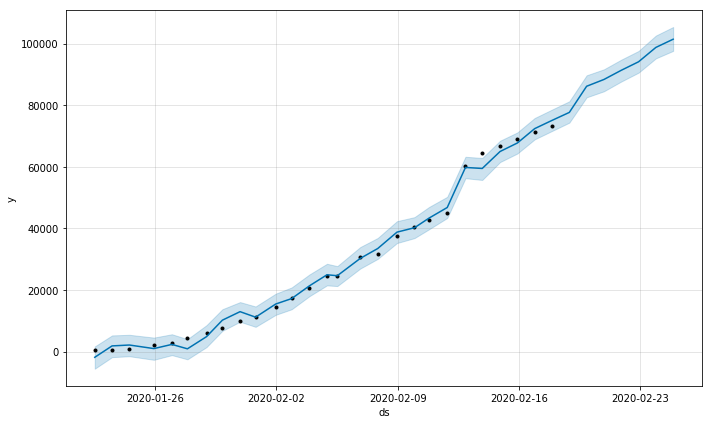

In [27]:
confirmed_forecast_plot = m.plot(forecast)

## This kernel will be periodically updated, with refresh in visualizations and forecasts (with new models)